<a href="https://colab.research.google.com/github/HungNguyen205/HK5--ThucHanhTriTueNhanTao/blob/main/THTTNT_2001230284_NguyenCaoManhHung_Buoi05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align ="center"><font color ="purple">⛅Báo Cáo Thực Hành Trí Tuệ Nhân Tạo</font></h1>
<h3>🚩Tuần 5 - Chủ đề: HỌC MÁY - K-Means</h3>

---

**Họ và tên:** Nguyễn Cao Mạnh Hùng<br/>
**MSSV:** 2001230284


# PHẦN 1: TỔNG QUAN LÝ THUYẾT

## 1.1. Kĩ thuật K-Means Clustering
**K-Means Clustering** là thuật toán thuộc nhóm **Học không giám sát (Unsupervised Learning)**, được sử dụng khi dữ liệu chưa được dán nhãn.
* **Mục tiêu:** Chia dữ liệu thành **$k$** nhóm (clusters) dựa trên đặc trưng. Các điểm dữ liệu trong cùng một nhóm sẽ có sự tương đồng cao nhất.
* **Ví dụ:** Phân nhóm khách hàng dựa trên hành vi mua sắm, phân loại văn bản...
* **Thuật toán:**
    1. Chọn ngẫu nhiên $k$ tâm cụm (centroids).
    2. Gán mỗi điểm dữ liệu vào tâm cụm gần nhất.
    3. Cập nhật lại vị trí tâm cụm bằng cách lấy trung bình tọa độ các điểm trong cụm.
    4. Lặp lại bước 2 và 3 cho đến khi vị trí các tâm không thay đổi (hội tụ).



## 1.2. Kĩ thuật K-NN (K-Nearest Neighbors)
**K-NN** là thuật toán thuộc nhóm **Học có giám sát (Supervised Learning)**, thường dùng cho bài toán phân loại (Classification) hoặc hồi quy (Regression).
* **Nguyên lý:** "Gần mực thì đen, gần đèn thì rạng". Để xác định nhãn cho một điểm dữ liệu mới, thuật toán sẽ tìm **$k$** điểm láng giềng gần nhất trong tập dữ liệu huấn luyện.
* **Quyết định:** Nhãn của điểm mới được quyết định bằng cách "bỏ phiếu" (voting) theo đa số từ các láng giềng tìm được.

## PHẦN 2: CÀI ĐẶT THUẬT TOÁN K-MEANS
Dưới đây là các bước thực hiện thuật toán phân cụm K-Means trên tập dữ liệu sinh ngẫu nhiên.

Code K-Means - Khởi tạo dữ liệu

Dữ liệu ban đầu:


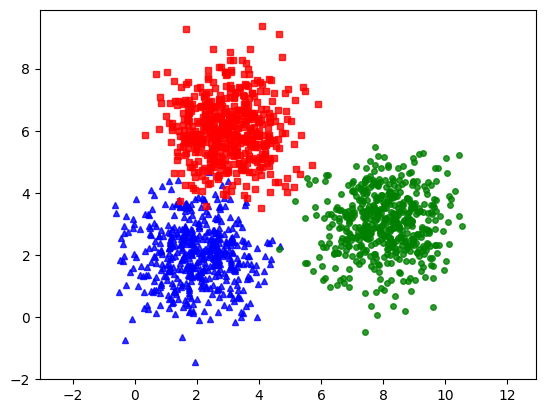

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

# Khởi tạo 3 tâm cụm ban đầu
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500

# Sinh dữ liệu ngẫu nhiên xung quanh 3 tâm
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# Gộp dữ liệu thành một tập X
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

# Nhãn gốc (dùng để tham chiếu, thực tế K-means không biết nhãn này)
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

# Hiển thị dữ liệu
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

print("Dữ liệu ban đầu:")
kmeans_display(X, original_label)

Code K-Means - Các hàm xử lý chính

In [2]:
# Bước 4: Hàm khởi tạo các tâm cụm ban đầu
def kmeans_init_centers(X, n_cluster):
    # Chọn ngẫu nhiên k dòng từ X làm tâm cụm ban đầu
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

# Bước 5: Hàm xác định nhãn cho các điểm dữ liệu (Tìm tâm gần nhất)
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    # Trả về index của tâm gần nhất
    return np.argmin(D, axis = 1)

# Bước 6: Hàm cập nhật lại vị trí các tâm cụm
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # Lấy tất cả các điểm thuộc cụm k
        Xk = X[labels == k, :]
        # Tính trung bình cộng để ra tâm mới
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# Bước 7: Hàm kiểm tra tính hội tụ (Tâm không đổi)
def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

# Hàm vẽ quá trình training
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i]
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i))
        plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i))
    plt.legend()
    plt.show()

K-Means - Vòng lặp chính (Main Loop)

--- BẮT ĐẦU THUẬT TOÁN K-MEANS ---
Initial centers:
 [[1.95180248 6.72897643]
 [1.9444814  3.06716532]
 [3.42144011 0.17309469]]


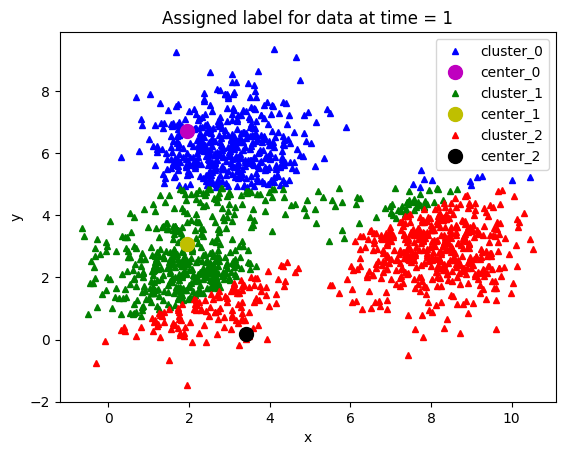

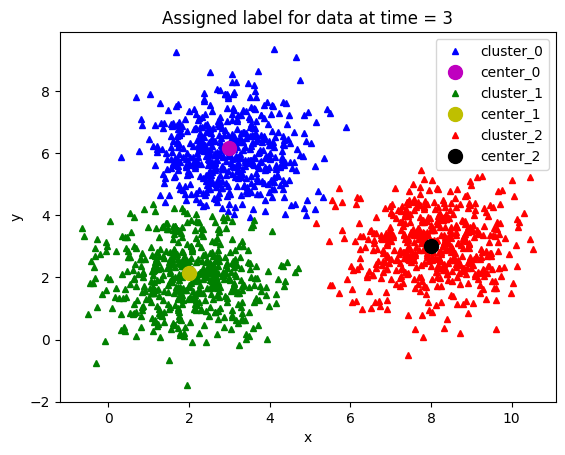

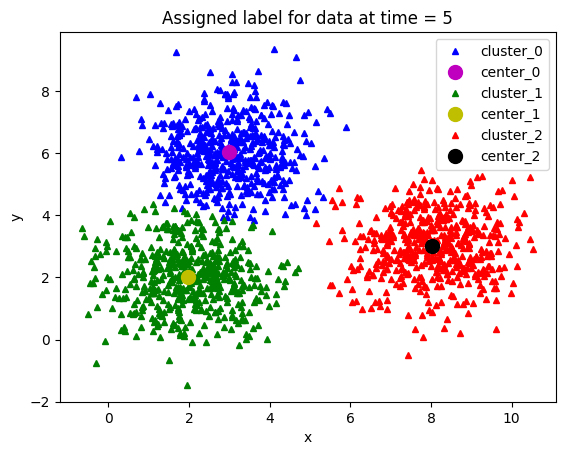

Done! Kmeans has converged after 5 times
Final centers:
 [[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


In [3]:
# Bước 9: Hàm chính của thuật toán
def kmeans(init_centes, init_labels, X, n_cluster):
    centers = init_centes
    labels = init_labels
    times = 0

    while True:
        # Gán nhãn cho các điểm
        labels = kmeans_predict_labels(X, centers)

        # Vẽ đồ thị minh họa quá trình
        if times % 2 == 0: # Chỉ vẽ một số bước để đỡ rối
             kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))

        # Cập nhật tâm cụm
        new_centers = kmeans_update_centers(X, labels, n_cluster)

        # Kiểm tra dừng
        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers
        times += 1

    return (centers, labels, times)

# --- THỰC THI ---
print("--- BẮT ĐẦU THUẬT TOÁN K-MEANS ---")
init_centers = kmeans_init_centers(X, K)
print("Initial centers:\n", init_centers)
init_labels = np.zeros(X.shape[0])

centers, labels, times = kmeans(init_centers, init_labels, X, K)

print('Done! Kmeans has converged after', times, 'times')
print('Final centers:\n', centers)

# PHẦN 3: HIỆN THỰC HÓA THUẬT TOÁN K-NN
Sử dụng thư viện `scikit-learn` để kiểm chứng và tự cài đặt lại hàm tính khoảng cách K-NN.

K-NN - Dữ liệu & Thư viện

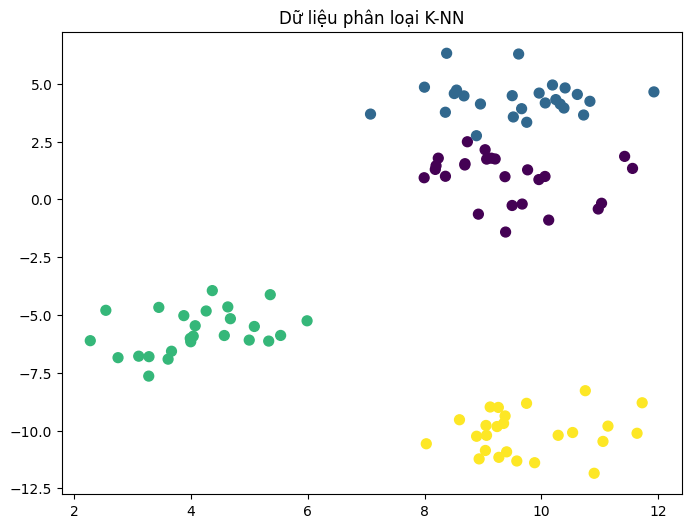

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 1. Tạo dữ liệu mẫu (100 điểm, 4 tâm/lớp)
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 4, cluster_std = 1, random_state = 4)

# 2. Vẽ dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker= 'o' , s=50)
plt.title("Dữ liệu phân loại K-NN")
plt.show()

# 3. Chia tập Train/Test (75% Train, 25% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

K-NN - Sử dụng Scikit-Learn

Độ chính xác trên tập Test (k=5): 0.96
Độ chính xác trên tập Test (k=1): 0.96


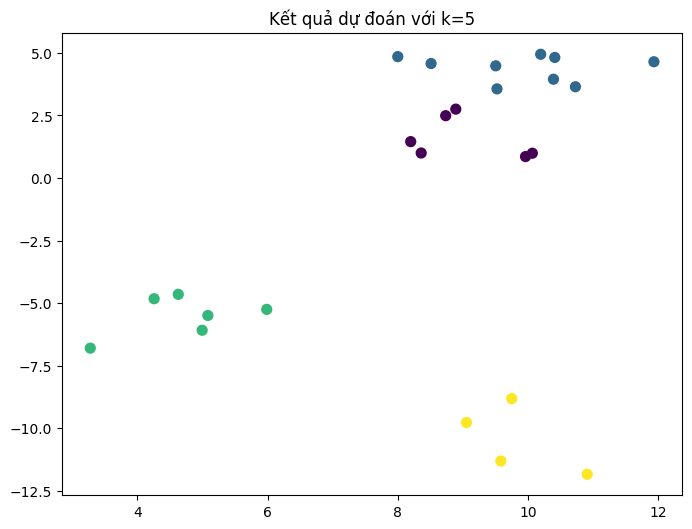

In [5]:
# Trường hợp k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)

# Trường hợp k=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)

print("Độ chính xác trên tập Test (k=5):", knn5.score(X_test, y_test))
print("Độ chính xác trên tập Test (k=1):", knn1.score(X_test, y_test))

# Vẽ kết quả dự đoán (với k=5)
plt.figure(figsize = (8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker='o', s=50)
plt.title("Kết quả dự đoán với k=5")
plt.show()

K-NN - Tự cài đặt (Manual Implementation)

In [6]:
def KNN_manual(X_train, X_test, y_train, k):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    y_pred = np.zeros((num_test, num_train))

    # Tính khoảng cách từ mỗi điểm test đến TOÀN BỘ điểm train
    for i in range(num_test):
        for j in range(num_train):
            # Khoảng cách Euclidean
            y_pred[i,j] = np.sqrt(np.sum(np.power(X_test[i,:] - X_train[j,:], 2)))

    results = []

    # Duyệt qua từng điểm test để tìm k láng giềng
    for i in range(len(y_pred)):
        # Ghép khoảng cách với nhãn tương ứng
        zipped = zip(y_pred[i,:], y_train)

        # Sắp xếp theo khoảng cách tăng dần (gần nhất đứng trước)
        res = sorted(zipped, key = lambda x: x[0])

        # Lấy k phần tử đầu tiên
        results_topk = res[:k]

        # Đếm số lượng (vote) của mỗi class
        classes = {}
        for _, label in results_topk:
            label = int(label)
            if label not in classes:
                classes[label] = 1
            else:
                classes[label] += 1

        # Chọn class có số phiếu bầu cao nhất
        results.append(max(classes, key = classes.get))

    return np.array(results)

# --- KIỂM THỬ HÀM TỰ VIẾT ---
# Lấy 1 điểm test mẫu
test_point = np.array([[1, 3]])
print(f"Dự đoán cho điểm {test_point} với k=3:")

# Chạy hàm tự viết
mypred = KNN_manual(X, test_point, y, 3)
print("Kết quả lớp dự đoán:", mypred)

Dự đoán cho điểm [[1 3]] với k=3:
Kết quả lớp dự đoán: [1]
